<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Detection-Classification-VIT/Tumor_Classification_Using_RGB_images_Convnext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchinfo

Class Names: ['Astrocitoma', 'Carcinoma', 'Ependimoma', 'Ganglioglioma', 'Germinoma', 'Glioblastoma', 'Granuloma', 'Meduloblastoma', 'Neurocitoma', 'Oligodendroglioma', 'Papiloma', 'Schwannoma', 'Tuberculoma', 'meningioma', 'no tumour', 'pituitary']
Train: (17920, 224, 224, 3), Validation: (4480, 224, 224, 3), Test: (9600, 224, 224, 3)


Epoch 1/10: 100%|██████████| 560/560 [00:24<00:00, 22.94batch/s, accuracy=19.4, loss=1.67]


Epoch 1/10 ━ Accuracy: 19.3583 - Loss: 2.4331 - Val_Accuracy: 32.6786 - Val_Loss: 1.9573


Epoch 2/10: 100%|██████████| 560/560 [00:23<00:00, 24.10batch/s, accuracy=46.9, loss=0.961]


Epoch 2/10 ━ Accuracy: 46.8750 - Loss: 1.6202 - Val_Accuracy: 58.1250 - Val_Loss: 1.3066


Epoch 3/10: 100%|██████████| 560/560 [00:23<00:00, 24.13batch/s, accuracy=65.4, loss=0.769]


Epoch 3/10 ━ Accuracy: 65.3516 - Loss: 1.0723 - Val_Accuracy: 70.2232 - Val_Loss: 0.9107


Epoch 4/10: 100%|██████████| 560/560 [00:23<00:00, 24.11batch/s, accuracy=78.1, loss=0.332]


Epoch 4/10 ━ Accuracy: 78.0971 - Loss: 0.7056 - Val_Accuracy: 81.3616 - Val_Loss: 0.5808


Epoch 5/10: 100%|██████████| 560/560 [00:23<00:00, 24.13batch/s, accuracy=85.5, loss=0.347]


Epoch 5/10 ━ Accuracy: 85.4967 - Loss: 0.4567 - Val_Accuracy: 90.8259 - Val_Loss: 0.3234


Epoch 6/10: 100%|██████████| 560/560 [00:23<00:00, 24.14batch/s, accuracy=91, loss=0.268]


Epoch 6/10 ━ Accuracy: 91.0491 - Loss: 0.2837 - Val_Accuracy: 91.0045 - Val_Loss: 0.2832


Epoch 7/10: 100%|██████████| 560/560 [00:23<00:00, 24.14batch/s, accuracy=93.2, loss=0.291]


Epoch 7/10 ━ Accuracy: 93.2031 - Loss: 0.2110 - Val_Accuracy: 95.3125 - Val_Loss: 0.1672


Epoch 8/10: 100%|██████████| 560/560 [00:23<00:00, 24.12batch/s, accuracy=95, loss=0.103]


Epoch 8/10 ━ Accuracy: 94.9665 - Loss: 0.1585 - Val_Accuracy: 95.6920 - Val_Loss: 0.1410


Epoch 9/10: 100%|██████████| 560/560 [00:23<00:00, 24.14batch/s, accuracy=95.9, loss=0.199]


Epoch 9/10 ━ Accuracy: 95.9208 - Loss: 0.1225 - Val_Accuracy: 94.5536 - Val_Loss: 0.1753


Epoch 10/10: 100%|██████████| 560/560 [00:23<00:00, 24.08batch/s, accuracy=96.6, loss=0.16]


Epoch 10/10 ━ Accuracy: 96.6350 - Loss: 0.1040 - Val_Accuracy: 97.3884 - Val_Loss: 0.0901
Test Accuracy: 97.19%


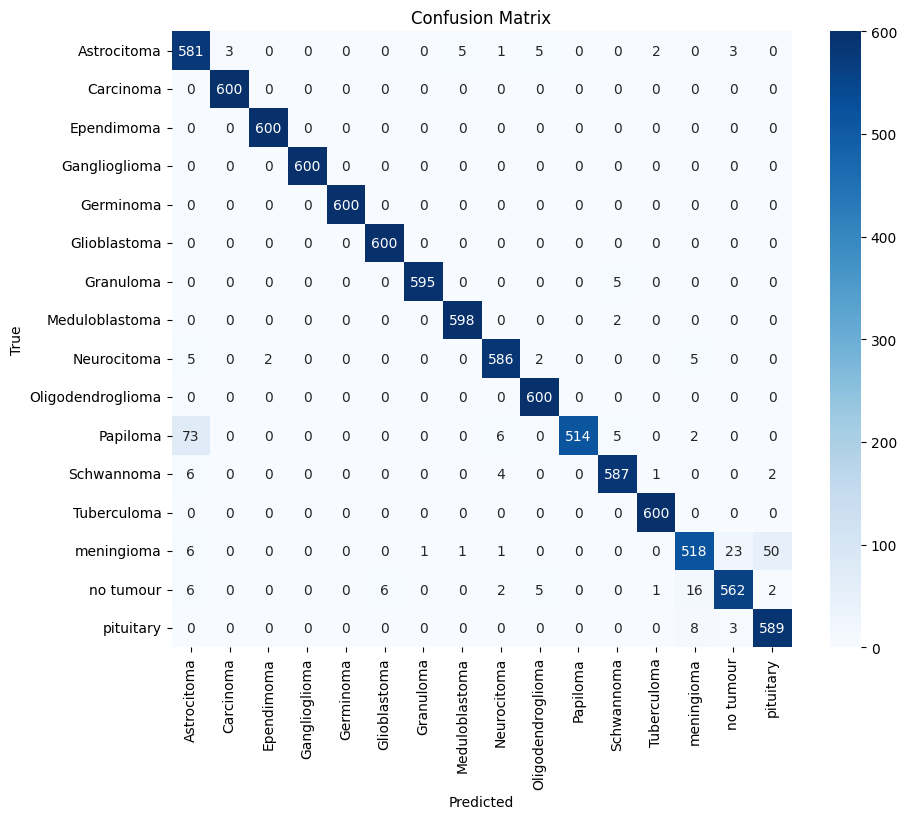

                   precision    recall  f1-score   support

      Astrocitoma       0.86      0.97      0.91       600
        Carcinoma       1.00      1.00      1.00       600
       Ependimoma       1.00      1.00      1.00       600
    Ganglioglioma       1.00      1.00      1.00       600
        Germinoma       1.00      1.00      1.00       600
     Glioblastoma       0.99      1.00      1.00       600
        Granuloma       1.00      0.99      0.99       600
   Meduloblastoma       0.99      1.00      0.99       600
      Neurocitoma       0.98      0.98      0.98       600
Oligodendroglioma       0.98      1.00      0.99       600
         Papiloma       1.00      0.86      0.92       600
       Schwannoma       0.98      0.98      0.98       600
      Tuberculoma       0.99      1.00      1.00       600
       meningioma       0.94      0.86      0.90       600
        no tumour       0.95      0.94      0.94       600
        pituitary       0.92      0.98      0.95       

In [ ]:
import os
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from torchinfo import summary

# Load and Preprocess Dataset
base_dir = "/content/drive/MyDrive/Colab Notebooks/Preprocessed_Dataset_classification"

def load_dataset(base_dir):
    images, labels = [], []
    class_names = sorted([d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))])
    print(f"Class Names: {class_names}")

    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(base_dir, class_name)
        for file in os.listdir(class_dir):
            if file.lower().endswith(('.jpg', '.jpeg', '.png')):
                file_path = os.path.join(class_dir, file)
                try:
                    image = tf.io.read_file(file_path)
                    image = tf.image.decode_image(image, channels=1)  # Load as grayscale
                    image = tf.image.resize(image, [224, 224])  # Resize
                    image = tf.image.grayscale_to_rgb(image)  # Convert to RGB
                    image = tf.cast(image, tf.float32) / 255.0  # Normalize

                    images.append(image.numpy())
                    labels.append(label)
                except Exception as e:
                    print(f"[ERROR] Could not process {file_path}: {e}")

    images = np.array(images, dtype=np.float32)
    labels = np.array(labels, dtype=np.int32)

    return images, labels, class_names

# Load dataset
images, labels, class_names = load_dataset(base_dir)

# Split dataset
train_images, test_images, train_labels, test_labels = train_test_split(
    images, labels, test_size=0.3, random_state=42, stratify=labels
)
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42, stratify=train_labels
)

print(f"Train: {train_images.shape}, Validation: {val_images.shape}, Test: {test_images.shape}")

# Define ConvNeXt Model
class ConvNeXtBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.dwconv = nn.Conv2d(dim, dim, kernel_size=7, padding=3, groups=dim)
        self.norm = nn.GroupNorm(1, dim)  # Replacing LayerNorm
        self.pwconv1 = nn.Linear(dim, 4 * dim)
        self.act = nn.GELU()
        self.pwconv2 = nn.Linear(4 * dim, dim)

    def forward(self, x):
        shortcut = x
        x = self.dwconv(x)
        x = x.permute(0, 2, 3, 1)  # (B, C, H, W) -> (B, H, W, C)
        x = self.norm(x.permute(0, 3, 1, 2))  # Normalize in (B, C, H, W)
        x = self.pwconv1(x.permute(0, 2, 3, 1))
        x = self.act(x)
        x = self.pwconv2(x)
        x = x.permute(0, 3, 1, 2)  # Back to (B, C, H, W)
        return x + shortcut  # Skip connection

class ConvNeXt(nn.Module):
    def __init__(self, in_channels=3, num_classes=16):
        super().__init__()
        self.stem = nn.Sequential(
            nn.Conv2d(in_channels, 64, kernel_size=4, stride=4),
            nn.GroupNorm(1, 64),
            nn.GELU()
        )
        self.blocks = nn.Sequential(*[ConvNeXtBlock(64) for _ in range(4)])
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = self.stem(x)
        x = self.blocks(x)
        x = self.pool(x).flatten(1)
        x = self.fc(x)
        return x

# Instantiate Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ConvNeXt().to(device)

# Model Summary
summary(model, input_size=(1, 3, 224, 224))

# Convert Dataset to PyTorch Tensors
batch_size = 32

def prepare_loader(images, labels):
    tensor_images = torch.tensor(images).permute(0, 3, 1, 2)  # (N, H, W, C) → (N, C, H, W)
    tensor_labels = torch.tensor(labels, dtype=torch.long)
    dataset = TensorDataset(tensor_images, tensor_labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_loader = prepare_loader(train_images, train_labels)
val_loader = prepare_loader(val_images, val_labels)
test_loader = prepare_loader(test_images, test_labels)

from tqdm import tqdm

# Training the Model with Verbose Output
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

        # Update progress bar
        loop.set_postfix(loss=loss.item(), accuracy=100 * correct / total)

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # Validation Step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_correct += predicted.eq(labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}/{num_epochs} ━ Accuracy: {train_acc:.4f} - Loss: {train_loss:.4f} - "
          f"Val_Accuracy: {val_acc:.4f} - Val_Loss: {val_loss:.4f}")

# Evaluate Model on Test Set
model.eval()
correct, total = 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")

# Confusion Matrix & Classification Report
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(all_labels, all_preds, target_names=class_names))

Train: (17920, 224, 224, 3), Validation: (4480, 224, 224, 3), Test: (9600, 224, 224, 3)


Epoch 1/15: 100%|██████████| 560/560 [01:58<00:00,  4.71batch/s, accuracy=17.1, loss=2.16]


Epoch 1/15 ━ Accuracy: 17.0592 - Loss: 2.5075 - Val_Accuracy: 24.6429 - Val_Loss: 2.3145


Epoch 2/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=31.9, loss=1.72]


Epoch 2/15 ━ Accuracy: 31.9196 - Loss: 2.0851 - Val_Accuracy: 42.3214 - Val_Loss: 1.8040


Epoch 3/15: 100%|██████████| 560/560 [01:59<00:00,  4.69batch/s, accuracy=49.1, loss=1.17]


Epoch 3/15 ━ Accuracy: 49.0792 - Loss: 1.5890 - Val_Accuracy: 59.8214 - Val_Loss: 1.2923


Epoch 4/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=65.3, loss=0.862]


Epoch 4/15 ━ Accuracy: 65.3013 - Loss: 1.0893 - Val_Accuracy: 68.6607 - Val_Loss: 0.9632


Epoch 5/15: 100%|██████████| 560/560 [01:58<00:00,  4.71batch/s, accuracy=75.3, loss=0.741]


Epoch 5/15 ━ Accuracy: 75.2790 - Loss: 0.7634 - Val_Accuracy: 80.2455 - Val_Loss: 0.6272


Epoch 6/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=82.7, loss=0.645]


Epoch 6/15 ━ Accuracy: 82.7065 - Loss: 0.5377 - Val_Accuracy: 80.7366 - Val_Loss: 0.5815


Epoch 7/15: 100%|██████████| 560/560 [01:58<00:00,  4.71batch/s, accuracy=86, loss=0.168]


Epoch 7/15 ━ Accuracy: 86.0435 - Loss: 0.4284 - Val_Accuracy: 85.6027 - Val_Loss: 0.4521


Epoch 8/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=88.4, loss=0.288]


Epoch 8/15 ━ Accuracy: 88.4487 - Loss: 0.3584 - Val_Accuracy: 87.6786 - Val_Loss: 0.3757


Epoch 9/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=90.5, loss=0.355]


Epoch 9/15 ━ Accuracy: 90.5469 - Loss: 0.2844 - Val_Accuracy: 90.7366 - Val_Loss: 0.3040


Epoch 10/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=90.6, loss=0.0435]


Epoch 10/15 ━ Accuracy: 90.6083 - Loss: 0.2893 - Val_Accuracy: 91.8973 - Val_Loss: 0.2725


Epoch 11/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=93.1, loss=0.395]


Epoch 11/15 ━ Accuracy: 93.1138 - Loss: 0.2105 - Val_Accuracy: 89.9777 - Val_Loss: 0.3133


Epoch 12/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=92.8, loss=0.0129]


Epoch 12/15 ━ Accuracy: 92.7734 - Loss: 0.2157 - Val_Accuracy: 93.5268 - Val_Loss: 0.2113


Epoch 13/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=93.4, loss=0.12]


Epoch 13/15 ━ Accuracy: 93.3594 - Loss: 0.2013 - Val_Accuracy: 90.6920 - Val_Loss: 0.3346


Epoch 14/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=92.6, loss=0.415]


Epoch 14/15 ━ Accuracy: 92.6451 - Loss: 0.2183 - Val_Accuracy: 89.5759 - Val_Loss: 0.3401


Epoch 15/15: 100%|██████████| 560/560 [01:59<00:00,  4.70batch/s, accuracy=95, loss=0.0879]


Epoch 15/15 ━ Accuracy: 95.0391 - Loss: 0.1491 - Val_Accuracy: 95.5580 - Val_Loss: 0.1676
Test Accuracy: 94.91%


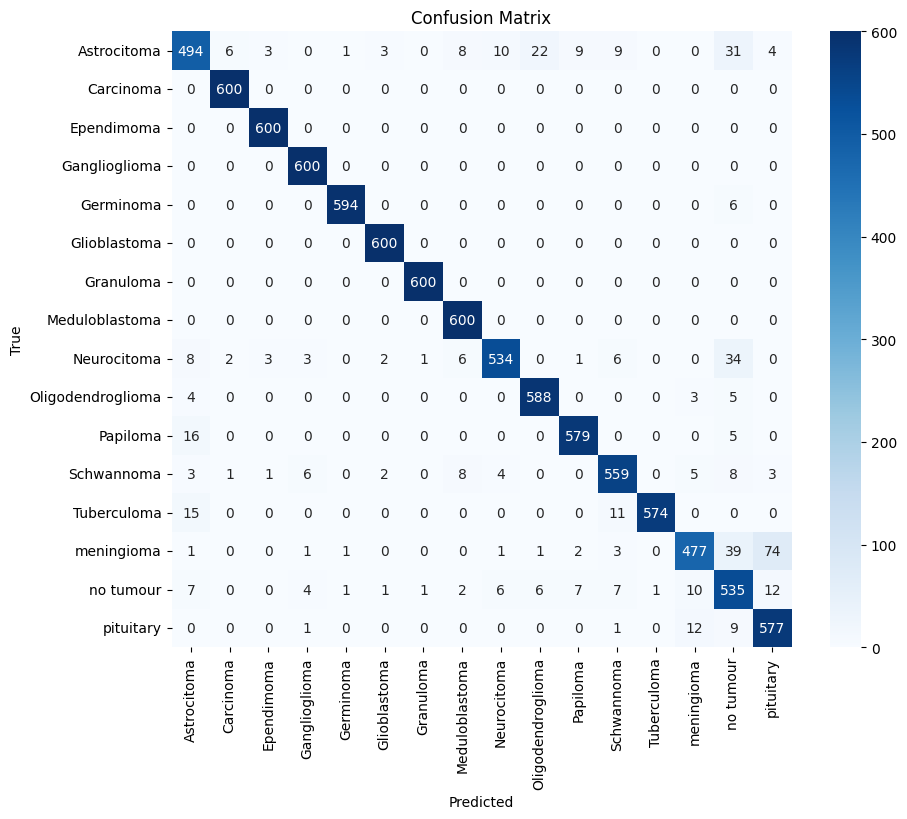

                   precision    recall  f1-score   support

      Astrocitoma       0.90      0.82      0.86       600
        Carcinoma       0.99      1.00      0.99       600
       Ependimoma       0.99      1.00      0.99       600
    Ganglioglioma       0.98      1.00      0.99       600
        Germinoma       0.99      0.99      0.99       600
     Glioblastoma       0.99      1.00      0.99       600
        Granuloma       1.00      1.00      1.00       600
   Meduloblastoma       0.96      1.00      0.98       600
      Neurocitoma       0.96      0.89      0.92       600
Oligodendroglioma       0.95      0.98      0.97       600
         Papiloma       0.97      0.96      0.97       600
       Schwannoma       0.94      0.93      0.93       600
      Tuberculoma       1.00      0.96      0.98       600
       meningioma       0.94      0.80      0.86       600
        no tumour       0.80      0.89      0.84       600
        pituitary       0.86      0.96      0.91       

In [ ]:
print(f"Train: {train_images.shape}, Validation: {val_images.shape}, Test: {test_images.shape}")

# Swin Transformer Model Implementation
class PatchEmbedding(nn.Module):
    def __init__(self, in_channels=3, patch_size=4, embed_dim=96):
        super().__init__()
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)
        self.norm = nn.LayerNorm(embed_dim)

    def forward(self, x):
        x = self.proj(x)  # (B, embed_dim, H/P, W/P)
        x = x.flatten(2).transpose(1, 2)  # (B, H*W/P^2, embed_dim)
        x = self.norm(x)
        return x

class SwinBlock(nn.Module):
    def __init__(self, dim, num_heads, window_size=7):
        super().__init__()
        self.attn = nn.MultiheadAttention(embed_dim=dim, num_heads=num_heads, batch_first=True)
        self.norm1 = nn.LayerNorm(dim)
        self.mlp = nn.Sequential(
            nn.Linear(dim, 4 * dim),
            nn.GELU(),
            nn.Linear(4 * dim, dim)
        )
        self.norm2 = nn.LayerNorm(dim)

    def forward(self, x):
        shortcut = x
        x, _ = self.attn(x, x, x)
        x = self.norm1(x + shortcut)
        x = self.mlp(x) + x
        x = self.norm2(x)
        return x

class SwinTransformer(nn.Module):
    def __init__(self, in_channels=3, num_classes=16, embed_dim=96, depth=2, num_heads=3):
        super().__init__()
        self.patch_embed = PatchEmbedding(in_channels, patch_size=4, embed_dim=embed_dim)
        self.blocks = nn.Sequential(*[SwinBlock(embed_dim, num_heads) for _ in range(depth)])
        self.pool = nn.AdaptiveAvgPool1d(1)
        self.fc = nn.Linear(embed_dim, num_classes)

    def forward(self, x):
        x = self.patch_embed(x)
        x = self.blocks(x)
        x = x.mean(dim=1)  # Global average pooling
        x = self.fc(x)
        return x

# Instantiate Model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SwinTransformer().to(device)

# Model Summary
summary(model, input_size=(1, 3, 224, 224))

# Convert Dataset to PyTorch Tensors
batch_size = 32

def prepare_loader(images, labels):
    tensor_images = torch.tensor(images).permute(0, 3, 1, 2)  # (N, H, W, C) → (N, C, H, W)
    tensor_labels = torch.tensor(labels, dtype=torch.long)
    dataset = TensorDataset(tensor_images, tensor_labels)
    return DataLoader(dataset, batch_size=batch_size, shuffle=True)

train_loader = prepare_loader(train_images, train_labels)
val_loader = prepare_loader(val_images, val_labels)
test_loader = prepare_loader(test_images, test_labels)

# Training the Model
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

from tqdm import tqdm

num_epochs = 15

for epoch in range(num_epochs):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    loop = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch")

    for images, labels in loop:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

        # Update progress bar
        loop.set_postfix(loss=loss.item(), accuracy=100 * correct / total)

    train_acc = 100 * correct / total
    train_loss = running_loss / len(train_loader)

    # Validation Step
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = outputs.max(1)
            val_correct += predicted.eq(labels).sum().item()
            val_total += labels.size(0)

    val_acc = 100 * val_correct / val_total
    val_loss /= len(val_loader)

    print(f"Epoch {epoch+1}/{num_epochs} ━ Accuracy: {train_acc:.4f} - Loss: {train_loss:.4f} - "
          f"Val_Accuracy: {val_acc:.4f} - Val_Loss: {val_loss:.4f}")


# Evaluate Model on Test Set
model.eval()
correct, total = 0, 0
all_preds, all_labels = [], []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = outputs.max(1)
        correct += predicted.eq(labels).sum().item()
        total += labels.size(0)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

test_acc = 100 * correct / total
print(f"Test Accuracy: {test_acc:.2f}%")

# Confusion Matrix & Classification Report
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(all_labels, all_preds, target_names=class_names))
